In [2]:
import pandas as pd
import numpy as np
dond = pd.read_csv('combined ratios.txt', sep="\t")
dond 
# 0 = female/L education 1 = male/H education

,Name,Avg Ratio,Max Ratio,Final Ratio,Consistent(Final Ratio = Max Ratio),Amount Won,Rounds Played,Deal / No Deal,Education,Gender,Age,Max-Final
0,Hans 1,0.402421,1.244444,1.244444,1,"189,000",7,1,0,1,45,0.000000
1,Rinus,0.339166,1.130388,1.130388,1,"151,000",4,1,1,1,57,0.000000
2,Jack,0.039233,0.078760,0.078760,1,"173,000",3,1,1,1,53,0.000000
3,Ronald,0.306444,0.996435,0.996435,1,"61,500",6,1,1,1,42,0.000000
4,Wim,0.084695,0.214718,0.214718,1,"244,000",3,1,0,1,41,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
145,Cindy,0.277907,0.784548,0.784548,1,"407,000",7,1,0,0,50,0.000000
146,Sherman,0.455972,1.000599,0.999400,0,"250,000",9,1,1,1,35,0.001199
147,Becky,0.322527,0.999706,0.999706,1,"85,000",8,1,0,0,28,0.000000
148,Joe,0.435064,1.021938,0.997506,0,"5,000",9,1,1,1,49,0.024432


In [3]:
dond.describe()

,Avg Ratio,Max Ratio,Final Ratio,Consistent(Final Ratio = Max Ratio),Rounds Played,Deal / No Deal,Education,Gender,Age,Max-Final
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.293230,0.766316,0.737325,0.860000,6.806667,0.873333,0.500000,0.600000,38.913333,0.028991
std,0.147172,0.366142,0.341861,0.348149,1.834409,0.333713,0.501675,0.491539,11.024644,0.133588
min,0.030269,0.064766,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.181782,0.441680,0.432669,1.000000,6.000000,1.000000,0.000000,0.000000,31.250000,0.000000
50%,0.288036,0.848430,0.835018,1.000000,7.000000,1.000000,0.500000,1.000000,36.000000,0.000000
75%,0.402782,1.000000,0.997234,1.000000,8.000000,1.000000,1.000000,1.000000,45.000000,0.000000
max,0.755299,1.904762,1.654956,1.000000,9.000000,1.000000,1.000000,1.000000,76.000000,1.135531


<AxesSubplot:xlabel='Age', ylabel='Max Ratio'>

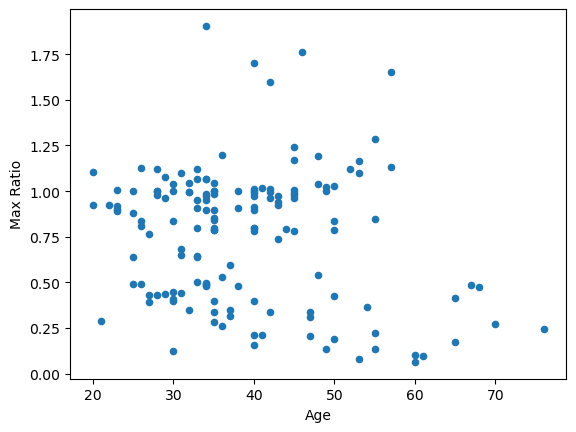

In [4]:
%matplotlib inline
dond.plot(kind = 'scatter', x = 'Age', y = 'Max Ratio')

<AxesSubplot:xlabel='Age', ylabel='Max Ratio'>

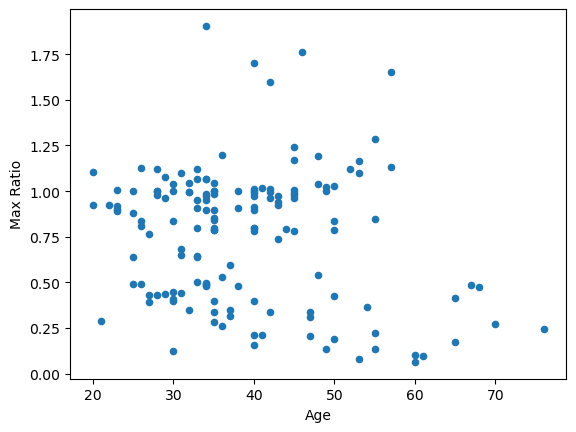

In [60]:
dond.plot(kind = 'scatter', x = 'Age', y = 'Max Ratio')

In [8]:
table = pd.pivot_table(dond, values=['Consistent(Final Ratio = Max Ratio)', 'Deal / No Deal'], index=['Gender'], aggfunc=np.sum)
consistent_count = table["Consistent(Final Ratio = Max Ratio)"]
dnd_count = table['Deal / No Deal']
totals_table = dond.value_counts(subset = ["Gender"], sort = False)
totals_list = totals_table.tolist()
table["Total"] = totals_list
table["Consistent %"] = table["Consistent(Final Ratio = Max Ratio)"]/table["Total"]
table["D/ND %"] = table["Deal / No Deal"]/table["Total"]
maxratio_table = pd.pivot_table(dond, values='Max Ratio', index=['Gender'], aggfunc=np.mean)
table["Mean Max Ratio"] = maxratio_table["Max Ratio"]
age_table = pd.pivot_table(dond, values='Age', index=['Gender'], aggfunc=np.mean)
table["Mean Age"] = age_table["Age"]
table = table.rename(columns = {"Consistent(Final Ratio = Max Ratio)": "Consistent Count", "Deal / No Deal": "D/ND Count"})
table

,Consistent Count,D/ND Count,Total,Consistent %,D/ND %,Mean Max Ratio,Mean Age
Gender,,,,,,,
0,54,51,60,0.900000,0.850000,0.769120,36.533333
1,75,80,90,0.833333,0.888889,0.764447,40.500000


In [9]:
table = pd.pivot_table(dond, values=['Consistent(Final Ratio = Max Ratio)', 'Deal / No Deal'], index=['Education'], aggfunc=np.sum)
consistent_count = table["Consistent(Final Ratio = Max Ratio)"]
dnd_count = table['Deal / No Deal']
totals_table = dond.value_counts(subset = ["Education"], sort = False)
totals_list = totals_table.tolist()
table["Total"] = totals_list
table["Consistent %"] = table["Consistent(Final Ratio = Max Ratio)"]/table["Total"]
table["D/ND %"] = table["Deal / No Deal"]/table["Total"]
maxratio_table = pd.pivot_table(dond, values='Max Ratio', index=['Education'], aggfunc=np.mean)
table["Mean Max Ratio"] = maxratio_table["Max Ratio"]
age_table = pd.pivot_table(dond, values='Age', index=['Education'], aggfunc=np.mean)
table["Mean Age"] = age_table["Age"]
table = table.rename(columns = {"Consistent(Final Ratio = Max Ratio)": "Consistent Count", "Deal / No Deal": "D/ND Count"})
table

,Consistent Count,D/ND Count,Total,Consistent %,D/ND %,Mean Max Ratio,Mean Age
Education,,,,,,,
0,67,67,75,0.893333,0.893333,0.745841,40.600000
1,62,64,75,0.826667,0.853333,0.786791,37.226667


In [10]:
table = pd.pivot_table(dond, values=['Consistent(Final Ratio = Max Ratio)', 'Deal / No Deal'], index=['Gender', 'Education'], aggfunc=np.sum)
consistent_count = table["Consistent(Final Ratio = Max Ratio)"]
dnd_count = table['Deal / No Deal']
totals_table = dond.value_counts(subset = ["Gender", "Education"], sort = False)
totals_list = totals_table.tolist()
table["Total"] = totals_list
table["Consistent %"] = table["Consistent(Final Ratio = Max Ratio)"]/table["Total"]
table["D/ND %"] = table["Deal / No Deal"]/table["Total"]
maxratio_table = pd.pivot_table(dond, values='Max Ratio', index=['Gender', 'Education'], aggfunc=np.mean)
table["Mean Max Ratio"] = maxratio_table["Max Ratio"]
age_table = pd.pivot_table(dond, values='Age', index=['Gender', 'Education'], aggfunc=np.mean)
table["Mean Age"] = age_table["Age"]
table = table.rename(columns = {"Consistent(Final Ratio = Max Ratio)": "Consistent Count", "Deal / No Deal": "D/ND Count"})
table

Consistent Count  D/ND Count  Total  Consistent %    D/ND %  \
Gender Education                                                                
0      0                        33          32     37      0.891892  0.864865   
       1                        21          19     23      0.913043  0.826087   
1      0                        34          35     38      0.894737  0.921053   
       1                        41          45     52      0.788462  0.865385   

                  Mean Max Ratio   Mean Age  
Gender Education                             
0      0                0.771366  39.540541  
       1                0.765505  31.695652  
1      0                0.720987  41.631579  
       1                0.796206  39.673077

In [11]:
ratio_table = pd.pivot_table(dond, values='Max Ratio', index=['Gender', 'Education'],
                    columns=['Consistent(Final Ratio = Max Ratio)'], aggfunc=np.mean)
ratio_table 
# max ratio broken down by consistency:

Consistent(Final Ratio = Max Ratio)         0         1
Gender Education                                       
0      0                             1.031393  0.739848
       1                             1.251934  0.719179
1      0                             1.317267  0.650837
       1                             0.951150  0.754635

# Models

### from ML Foundations

In [52]:
response = 'Rounds Played'
y = dond[[response]]
y

,Rounds Played
0,7
1,4
2,3
3,6
4,3
...,...
145,7
146,9
147,8
148,9


In [53]:
predictors = ["Education", "Gender", "Age"]
x = dond[predictors]
x

,Education,Gender,Age
0,0,1,45
1,1,1,57
2,1,1,53
3,1,1,42
4,0,1,41
...,...,...,...
145,0,0,50
146,1,1,35
147,0,0,28
148,1,1,49


In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y) 
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
model.intercept_

array([9.56529476])

In [55]:
model.coef_

array([[-0.25736436, -0.15162811, -0.06263732]])

In [58]:
model.score(x_test, y_test)

0.10928111868790547

In [57]:
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.24812635665444813

### from sklearn exercise notebook

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [20]:
X_train, X_test, y_train, y_test = train_test_split(dond[['Age']], dond['Deal / No Deal'])
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [21]:
# One observation's age after standardization
X_test[0].reshape(1,-1)

array([[1.21881442]])

In [22]:
print('prediction', clf.predict(X_test[0].reshape(1,-1))[0])
print('probability', clf.predict_proba(X_test[0].reshape(1,-1)))

prediction 1
probability [[0.0772011 0.9227989]]


In [23]:
example_df = pd.DataFrame()
example_df.loc[:, 'Age'] = X_test.reshape(-1)
example_df.loc[:, 'Deal / No Deal'] = y_test.values
example_df['logistic_preds'] = pd.DataFrame(clf.predict_proba(X_test))[1]
example_df.head()

,Age,Deal / No Deal,logistic_preds
0,1.218814,1,0.922799
1,1.218814,1,0.922799
2,-1.750690,0,0.841570
3,-1.210780,1,0.860256
4,0.049010,1,0.896738


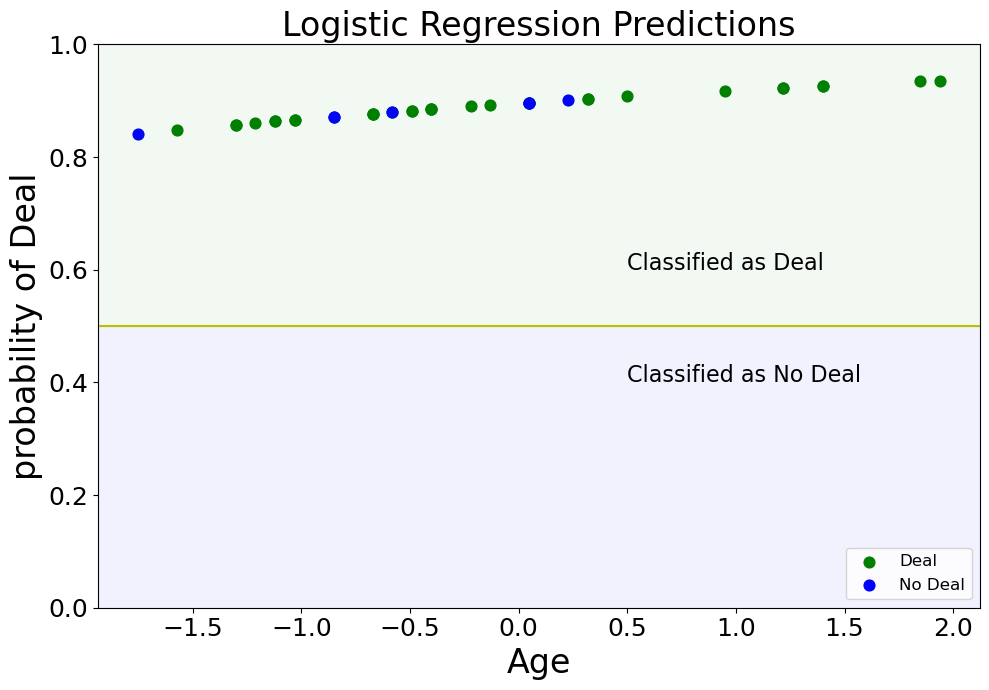

In [24]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));


virginicaFilter = example_df['Deal / No Deal'] == 1
versicolorFilter = example_df['Deal / No Deal'] == 0

ax.scatter(example_df.loc[virginicaFilter, 'Age'].values,
            example_df.loc[virginicaFilter, 'logistic_preds'].values,
           color = 'g',
           s = 60,
           label = 'Deal')


ax.scatter(example_df.loc[versicolorFilter, 'Age'].values,
            example_df.loc[versicolorFilter, 'logistic_preds'].values,
           color = 'b',
           s = 60,
           label = 'No Deal')

ax.axhline(y = .5, c = 'y')

ax.axhspan(.5, 1, alpha=0.05, color='green')
ax.axhspan(0, .4999, alpha=0.05, color='blue')
ax.text(0.5, .6, 'Classified as Deal', fontsize = 16)
ax.text(0.5, .4, 'Classified as No Deal', fontsize = 16)

ax.set_ylim(0,1)
ax.legend(loc = 'lower right', markerscale = 1.0, fontsize = 12)
ax.tick_params(labelsize = 18)
ax.set_xlabel('Age', fontsize = 24)
ax.set_ylabel('probability of Deal', fontsize = 24)
ax.set_title('Logistic Regression Predictions', fontsize = 24)
fig.tight_layout()


In [25]:
score = clf.score(X_test, y_test)
print(score)

0.8157894736842105


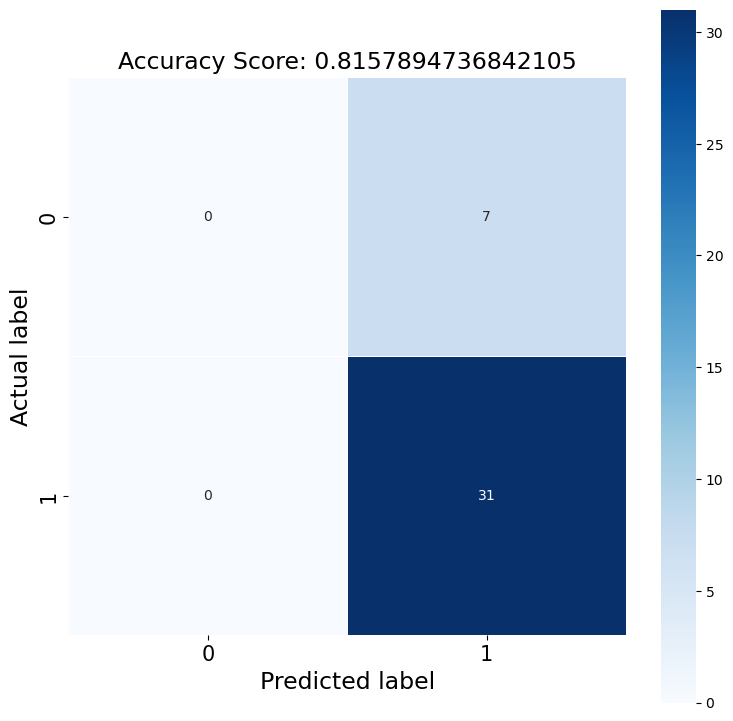

In [26]:
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

### Multiple Regression from W3 Schools

In [27]:
X = dond[['Age', 'Gender', 'Education']]
y = dond['Deal / No Deal']
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [28]:
#predict D/ND where the age is 40, gender is 1, and education is 0:
predicteddnd = regr.predict([[40, 1, 0]])
print(predicteddnd)

[0.9083973]


C:\Users\llaur\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Lin Reg from analytics_vidya @ medium

In [29]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

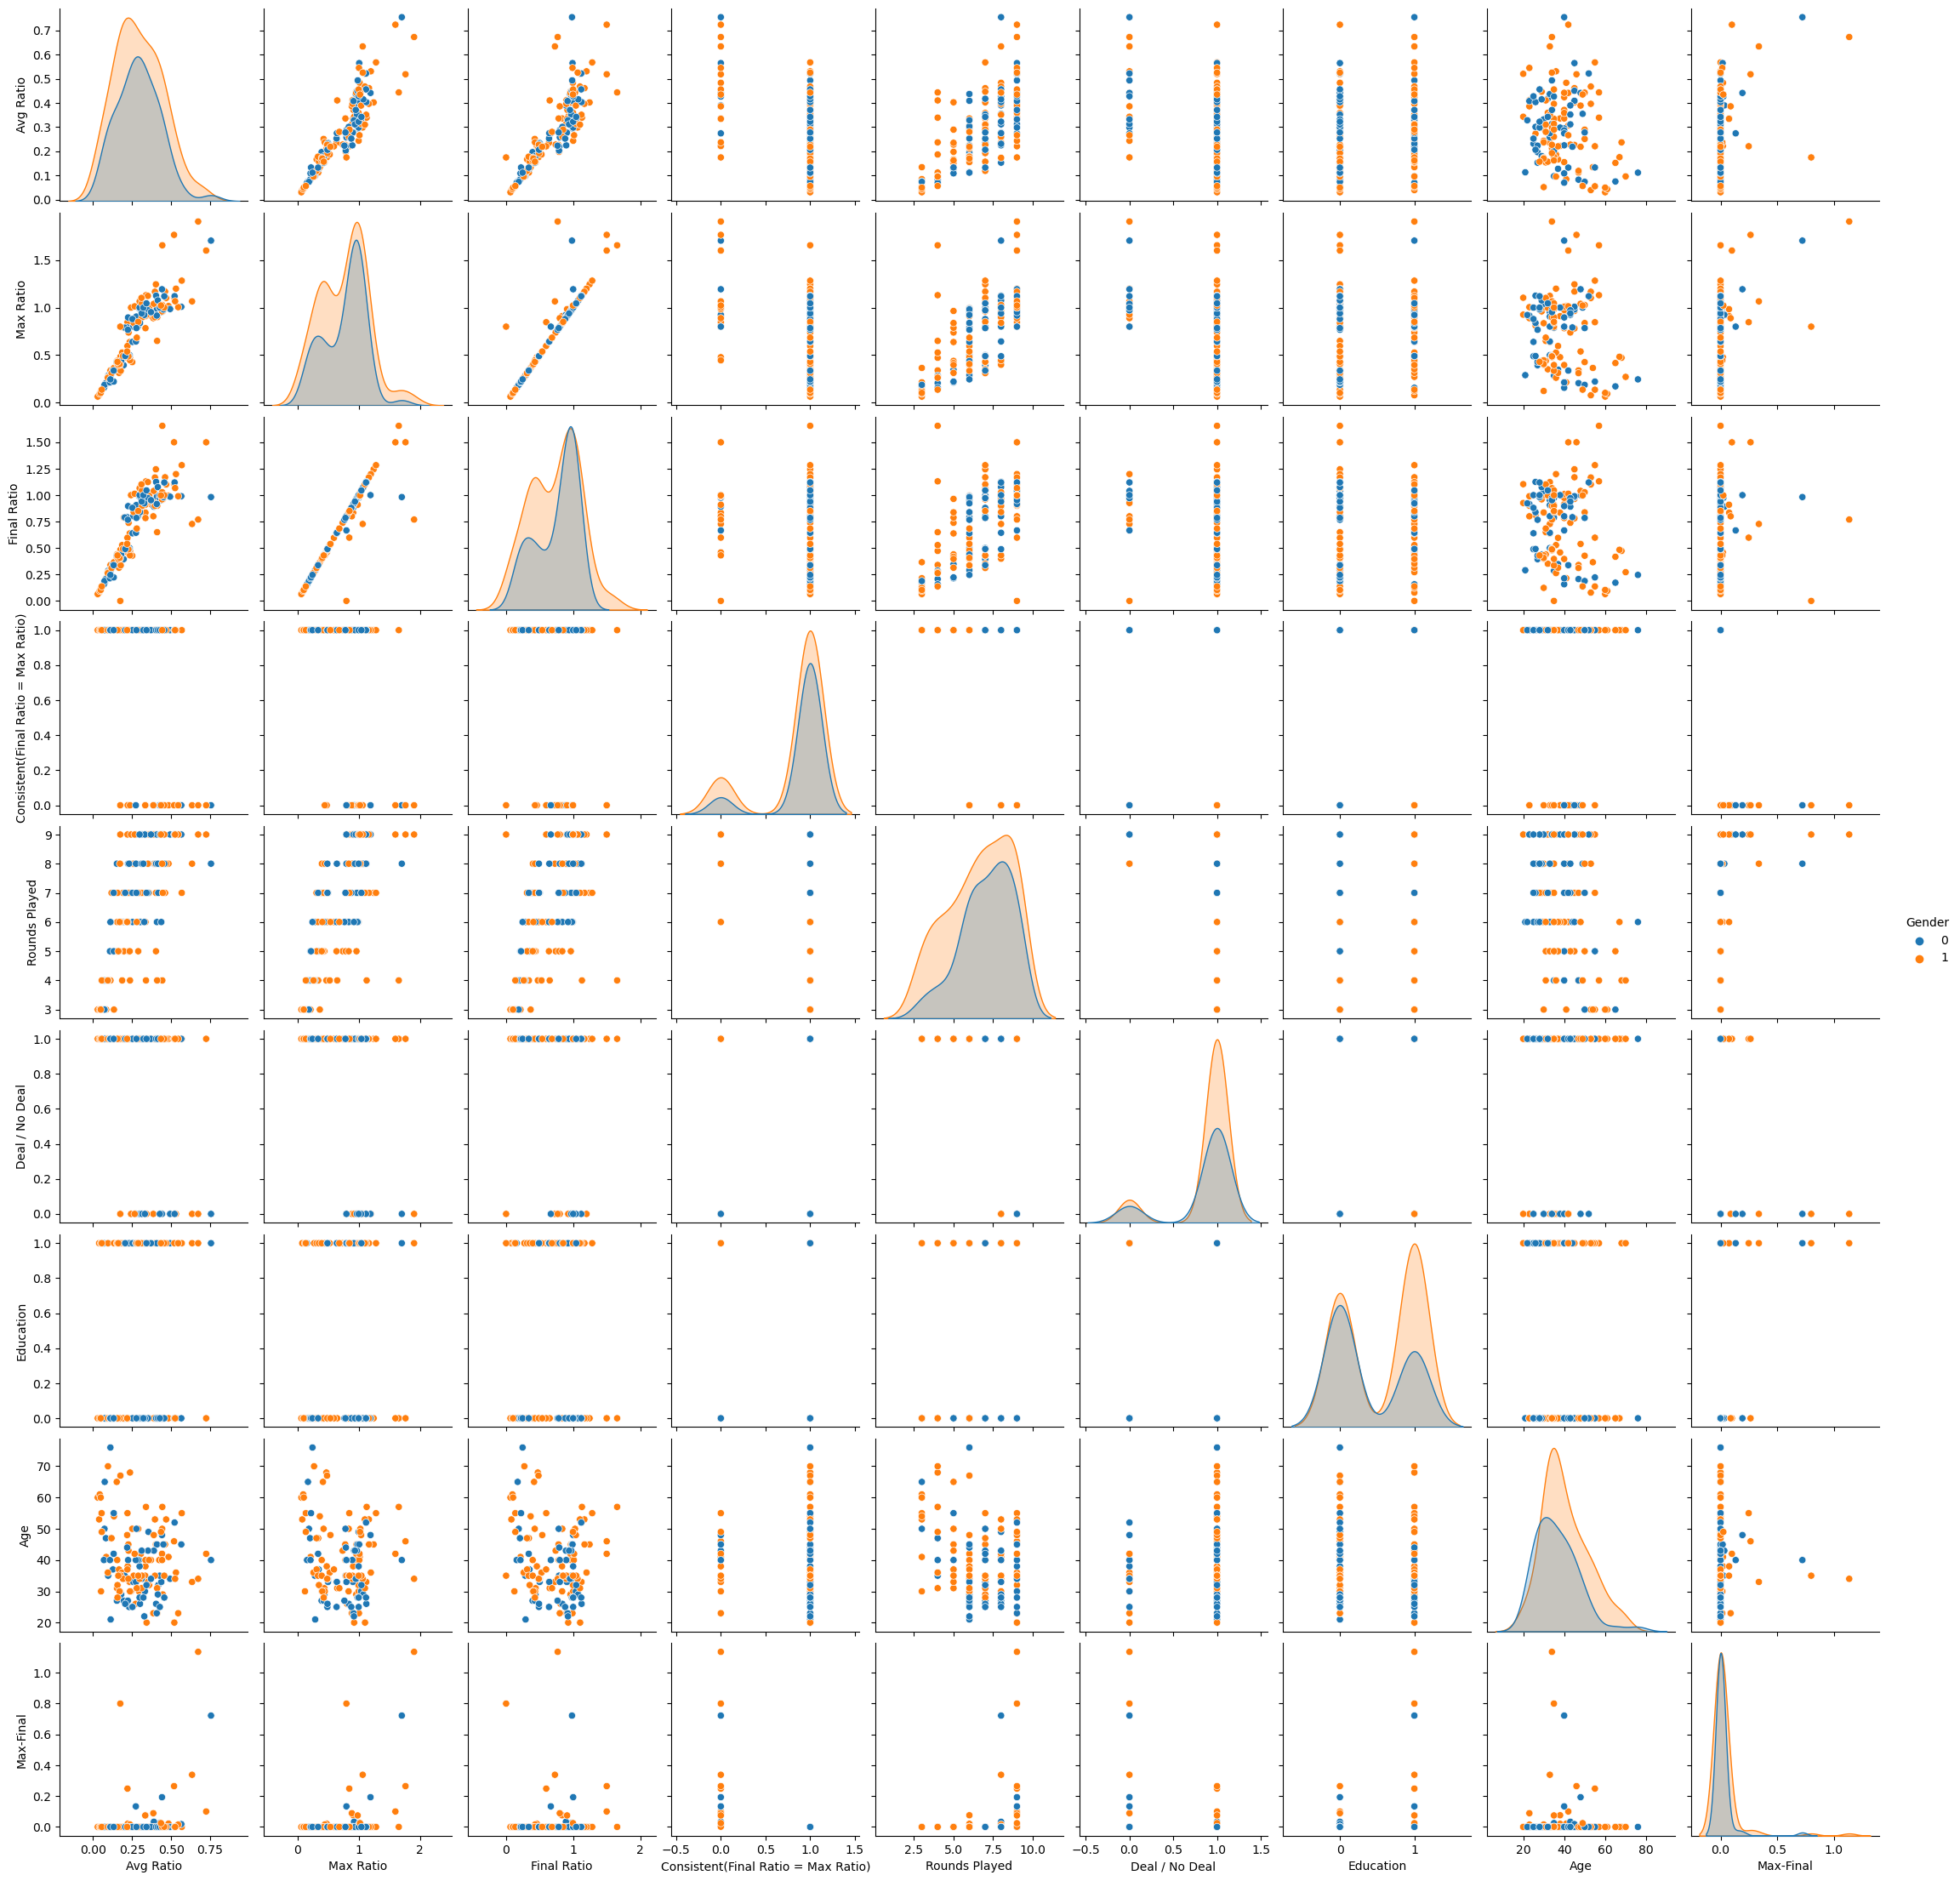

In [30]:
sns.pairplot(dond, hue='Gender')

In [31]:
dond.corr()

,Avg Ratio,Max Ratio,Final Ratio,Consistent(Final Ratio = Max Ratio),Rounds Played,Deal / No Deal,Education,Gender,Age,Max-Final
Avg Ratio,1.000000,0.896781,0.836214,-0.402853,0.667410,-0.330979,0.059110,0.010132,-0.196333,0.317990
Max Ratio,0.896781,1.000000,0.931069,-0.330038,0.666653,-0.330646,0.056108,-0.006273,-0.187321,0.358155
Final Ratio,0.836214,0.931069,1.000000,-0.142590,0.627372,-0.185878,0.004137,-0.031262,-0.194248,-0.007174
Consistent(Final Ratio = Max Ratio),-0.402853,-0.330038,-0.142590,1.000000,-0.357929,0.250706,-0.096065,-0.094124,0.016052,-0.539679
Rounds Played,0.667410,0.666653,0.627372,-0.357929,1.000000,-0.413027,0.010939,-0.123557,-0.394086,0.221691
Deal / No Deal,-0.330979,-0.330646,-0.185878,0.250706,-0.413027,1.000000,-0.060132,0.057281,0.115570,-0.430568
Education,0.059110,0.056108,0.004137,-0.096065,0.010939,-0.060132,1.000000,0.190516,-0.153503,0.143197
Gender,0.010132,-0.006273,-0.031262,-0.094124,-0.123557,0.057281,0.190516,1.000000,0.176856,0.062810
Age,-0.196333,-0.187321,-0.194248,0.016052,-0.394086,0.115570,-0.153503,0.176856,1.000000,-0.016320
Max-Final,0.317990,0.358155,-0.007174,-0.539679,0.221691,-0.430568,0.143197,0.062810,-0.016320,1.000000


<AxesSubplot:>

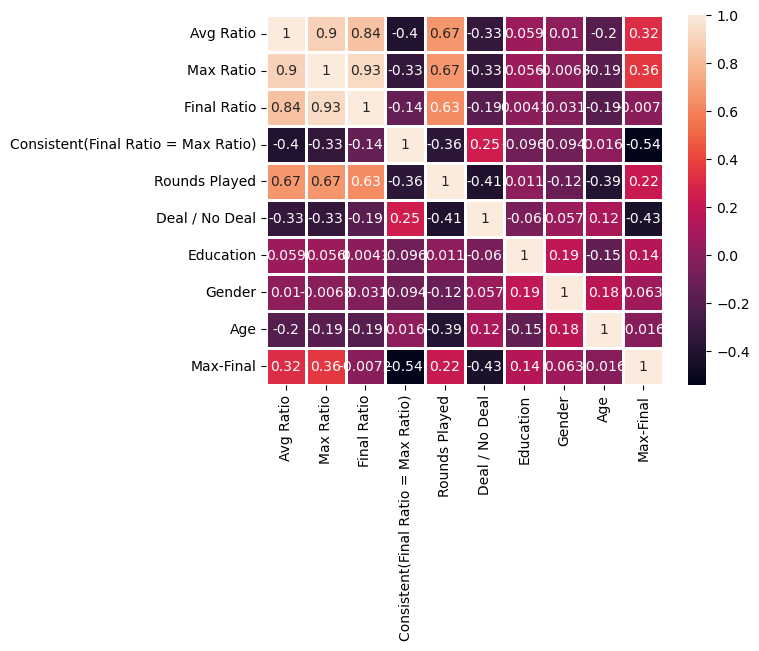

In [32]:
sns.heatmap(dond.corr(),annot=True,lw=1)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

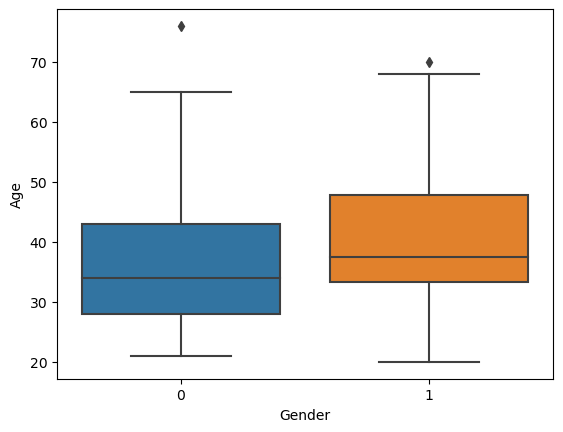

In [33]:
sns.boxplot(y='Age',x='Gender',data=dond)

In [34]:
X = dond[['Age', 'Gender', 'Education']]
X.head()


,Age,Gender,Education
0,45,1,0
1,57,1,1
2,53,1,1
3,42,1,1
4,41,1,0


In [42]:
Y = dond['Consistent(Final Ratio = Max Ratio)']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 3)
(60, 3)
(90,)
(60,)


In [44]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [45]:
print(model.intercept_)
# expected mean value of Y when all X=0

0.901143917560227


In [46]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Age,0.000346
Gender,-0.096303
Education,-0.052750


In [47]:
predictions = model.predict(X_test)
predictions

array([0.85774047, 0.91499104, 0.82561156, 0.85739429, 0.91499104,
       0.91049073, 0.91602958, 0.76489921, 0.76420686, 0.77182278,
       0.9108369 , 0.76593775, 0.76593775, 0.81522622, 0.81661093,
       0.76247597, 0.82318832, 0.81695711, 0.81661093, 0.76420686,
       0.86016372, 0.76593775, 0.76386068, 0.818688  , 0.91672193,
       0.81938036, 0.76386068, 0.81661093, 0.8605099 , 0.90841366,
       0.76247597, 0.81591858, 0.85739429, 0.76420686, 0.82111125,
       0.8155724 , 0.91429869, 0.76939953, 0.76420686, 0.9156834 ,
       0.76766864, 0.86224079, 0.77632309, 0.91049073, 0.92018371,
       0.82041889, 0.85635576, 0.76593775, 0.91291397, 0.81522622,
       0.76939953, 0.76697628, 0.85981754, 0.81903418, 0.91672193,
       0.7635145 , 0.85981754, 0.77078424, 0.76282215, 0.82145743])

<AxesSubplot:xlabel='Consistent(Final Ratio = Max Ratio)'>

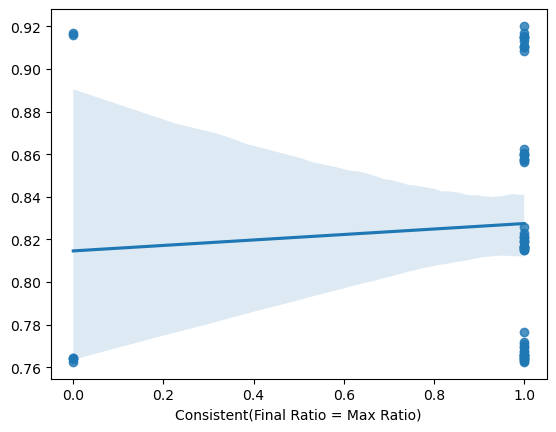

In [48]:
sns.regplot(y_test,predictions)


In [49]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Consistent(Final Ratio = Max Ratio)   R-squared:                       0.025
Model:                                             OLS   Adj. R-squared:                 -0.009
Method:                                  Least Squares   F-statistic:                    0.7388
Date:                                 Wed, 01 Feb 2023   Prob (F-statistic):              0.532
Time:                                         12:07:09   Log-Likelihood:                -37.726
No. Observations:                                   90   AIC:                             83.45
Df Residuals:                                       86   BIC:                             93.45
Df Model:                                            3                                         
Covariance Type:                             nonrobust                                         
                 coef    std err        